In [28]:
import protocols 
from matplotlib import pyplot as plt
from setting import Setting

setting = Setting(host_num=3, total_time=100, packet_num=4, max_collision_wait_time=20, p_resend=0.3, packet_size=3, link_delay=1, seed=111550050)
print('aloha')
result = protocols.aloha(setting, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('slotted_aloha')
result = protocols.slotted_aloha(setting, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('csma')
result = protocols.csma(setting, 0, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('csma_cd')
result = protocols.csma_cd(setting, 0, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

aloha
                      V   V                           V                     V                           
h0: ..................<---><--->......................<---|.....<---|................<---|.........<---|
                                        V     V                   V              V                      
h1: ....................................<---|............<---|...................<---|..............<---
                                   V   V            V                         V                         
h2: ...............................<---><---|...............<---|.............<---|.........<---><---|..
success_rate: 0.2
idle_rate: 0.41
collision_rate: 0.39
slotted_aloha
                      V   V                           V                     V                           
h0: ....................<---><--->....................<---|.....<---|..........<---|....................
                                        V     V                   V              V   

In [29]:
# Q2
success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
packet_num_list = [1200,800,600,400]
host_num_list = [2,3,4,6]
n = 10

range_of_test = range(1, 20, 1)

for p in range_of_test:
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    for s in range(n):
        problem = Setting(packet_size=p)
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]
    
    for i in range(4):
        success_rate_list[i].append(success_rate[i]/n)
        idle_rate_list[i].append(idle_rate[i]/n)
        collision_rate_list[i].append(collision_rate[i]/n)

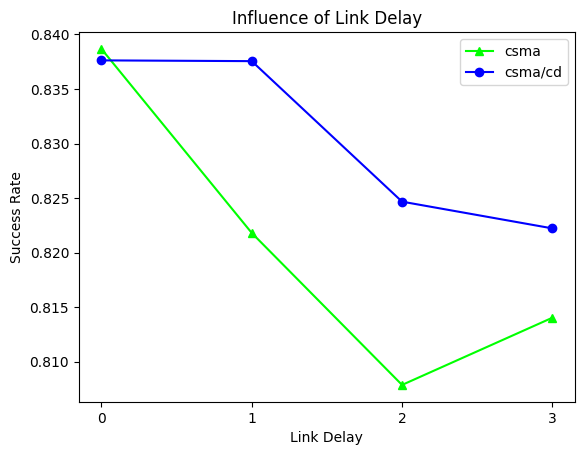

In [30]:
plt.plot(range_of_test, success_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(range_of_test, success_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(range_of_test, success_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(range_of_test, success_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Packet Size')
plt.ylabel('Success Rate')
# plt.xticks(host_num_list)
plt.title('Influence of Packet Size')
plt.legend()
plt.show()

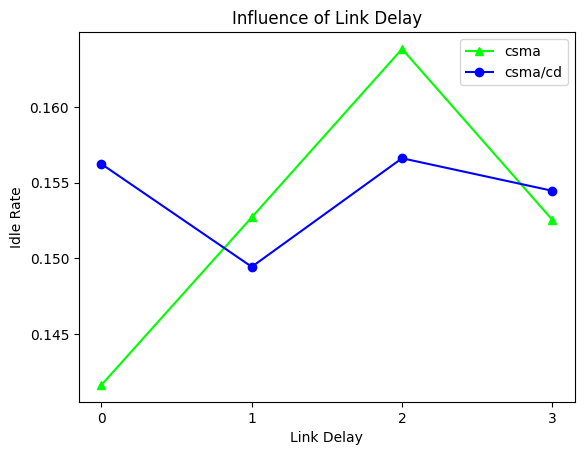

In [31]:
plt.plot(range_of_test, idle_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(range_of_test, idle_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(range_of_test, idle_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(range_of_test, idle_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Packet Size')
plt.ylabel('Idle Rate')
# plt.xticks(host_num_list)
plt.title('Influence of Packet Size')
plt.legend()
plt.show()

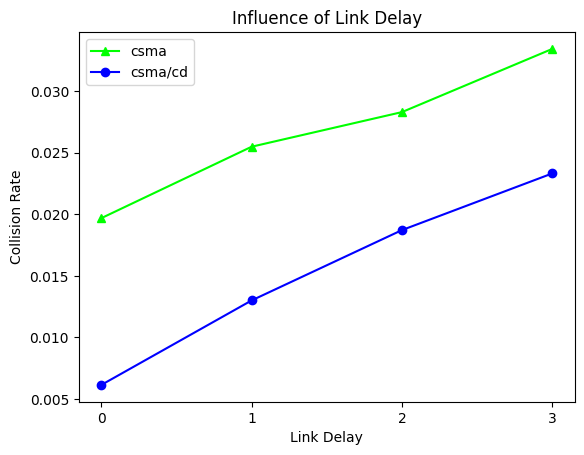

In [32]:

plt.plot(link_delay_list, collision_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(link_delay_list, collision_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(link_delay_list, collision_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(link_delay_list, collision_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Packet Size')
plt.ylabel('Collision Rate')
# plt.xticks(host_num_list)
plt.title('Influence of Packet Size')
plt.legend()
plt.show()